# CP 2025-2026: Lecture 3 - Solving linear and nonlinear systems of equation

### General Guidelines

> ⚠️⚠️⚠️ READ CAREFULLY ⚠️⚠️⚠️

- Do not add, delete or create cells, write the answer only in the space marked with the three dots (`...`). Where function skeletons are provided, it is assumed that that function can be called again with different inputs somewhere else. So be careful to write code outside of functions.
  - Function should be ['pure'](https://en.wikipedia.org/wiki/Pure_function), thus no side effects, unless otherwise specified.
- Run the the first cell to import all libraries when opening the notebook before running your own code.
- Read carefully what is required to be printed/returned/plotted in the answer. Please do not output what is not asked for. 
  - If you used the print function for debugging, comment it out ( Ctlr + / ) before submitting
- All plots should have title, xlabel, ylabel, and legend (if there are more than one curve on the plot)
- Use the `help()` function, consult python documentation when using new functions, or do a web search and consult [stackoverflow](https://stackoverflow.com/questions/tagged/python)
- Please read the error messages if you get any, and try to understand what they mean. Debugging code is an essential skill to develop.
- You can use `%debug` to start an IPython console in a cell (or a scratchpad cell!) after an exception has occurred to try to debug.
- You can use `%pdb` to toggle the Python DeBugger (pdb) auto start after an unhandled exception.
- In the assignments you will find some tests put in place, to help you verify your solution. If these fail you are certain you did something wrong, thus look at the hints they provide. But passing these tests does __not__ mean your solution is actually correct.

Make sure you use `python3.12` and the package versions as stated in the provided `requirements.txt`. This file should also be on the course page.

In [1]:
# Importing relevant libraries in the assignment

# This will create static plots (no zooming etc.)
# otherwise try just plain `%matplotlib`, or install a backend such as ipympl or PyQt5 and
# do or `%matplotlib ipympl` `%matplotlib qt`
%matplotlib inline

REPEAT_IMPORTS = True

if REPEAT_IMPORTS or ("IMPORTED_ALL" not in globals()):  # To save you a bit of time

    def print_import_info(package):
        print(
            "Successfully imported %-15s \tVersion: %10s"
            % (package.__name__, package.__version__)
        )

    ### Standard library imports

    import sys

    print("Python version {}".format(sys.version))
    if sys.version_info < (3, 12):
        print(
            "\u001b[31m"  # red
            "\u001b[1m"  # bold
            "WARNING: Use Python 3.12 or newer not to encounter any errors or "
            "problems later on.\n"
            "You can chance the the version. "
            "This sometime can be done by switching the kernel under the 'Kernel' tab."
            "\u001b[0m"  # reset
        )
    del sys  # Do not need it anymore

    from typing import Callable

    ### Import third party libraries
    # Initialize self assessment helper
    import otter

    grader = otter.Notebook("Assignment_Q1_L3.ipynb")

    import numpy as np
    import numpy.typing as npt

    print_import_info(np)
    import scipy

    print_import_info(scipy)
    import matplotlib
    import matplotlib.pyplot as plt

    print_import_info(matplotlib)

    IMPORTED_ALL = True
    print("Finished importing packages")
else:
    print("Already imported all packages")

Python version 3.12.10 (v3.12.10:0cc81280367, Apr  8 2025, 08:46:59) [Clang 13.0.0 (clang-1300.0.29.30)]
Successfully imported numpy           	Version:      2.3.2
Successfully imported scipy           	Version:     1.16.1
Successfully imported matplotlib      	Version:     3.10.5
Finished importing packages


### Part 1: Algebra recap
This first part of this assignment is related to the algebra recap of the corresponding lecture. 

#### Question 1: Defining vectors and matrices
In this task, you will practice to define vectors and matrices of various shapes and dimensions. For additional information, check out the corresponding numpy commands in the numpy package documentation! It is recommended to use the _[`np.shape()`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)_ command or  _[`ndarray.shape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html#numpy.ndarray.shape)_ to check whether the dimensions of your numpy arrays are correct.

Tasks:
- Create a 1D numpy array `array_1d` with the entries  $\begin{pmatrix}
  3\\ 
  5\\
  6\\
  7
\end{pmatrix}$.
- Reformulate the above vector into a 2D numpy array `array_2d`. Hint: the shape should be $(4,1)$ instead of $(4,)$.
- Create a 2D $(2,2)$ numpy array `matrix_2d` with the entries  $\begin{pmatrix}
  3 & 4\\ 
  9 & 8
\end{pmatrix}$
- Create a 1D vector `custom_vector` with the values $\begin{pmatrix}
  2\\ 
  4\\
  6\\
  8\\
  10
\end{pmatrix}$ using _[`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)_.
- Create a 5x5 matrix `random_int_matrix` with random integers in the interval $[1,10)$ using _[`np.random.randint()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)_.
- Create a 2x2 matrix `normal_matrix` with random values drawn from a normal (Gaussian) distribution using _[`np.random.randn()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)_.

In [2]:
array_1d = np.array([3,5,6,7])
array_2d = np.array(([3],[5],[6],[7]))
matrix_2d = np.array(([3,4],[9,8]))
custom_vector = np.arange(2,12,2) 
random_int_matrix = np.random.randint(1,10,[5,5])
normal_matrix = np.random.randn(2,2)

In [3]:
grader.check("q1.1")

q1.1 results: All test cases passed!

#### Question 2: Special numpy commands
- Create a 4x4 numpy array `full_matrix` filled with the value 7 using _[`np.full()`](https://numpy.org/doc/stable/reference/generated/numpy.full.html)_.
- Create a 1D numpy array `zero_vector` of zeros with length 5 using _[`np.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)_.
- Create a 1D numpy array `ones_vector` of ones with length 10 using _[`np.ones()`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html)_.
- Generate a 4x4 identity matrix `identity_matrix` using _[`np.eye()`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html)_.
- Create a diagonal matrix `diagonal_matrix` with the values [1, 2, 3, 4] on the diagonal using _[`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)_.
- Create a random 5x5 matrix `random_matrix_5x5`. The matrix should contain random *integer* values in the interval $[1,10)$. Please, check the function [`np.random.randint()`](https://numpy.org/devdocs/reference/random/generated/numpy.random.randint.html)
- Extract the upper triangular part `upper_tri` (**excluding the diagonal**) of the random matrix `random_matrix_5x5` using _[`np.triu()`](https://numpy.org/doc/stable/reference/generated/numpy.triu.html)_.
- Create the lower triangular matrix `lower_tri` (**excluding the diagonal**) of the random matrix `random_matrix_5x5` as well using _[`np.tril()`](https://numpy.org/doc/stable/reference/generated/numpy.tril.html)_.

    **IMPORTANT**: Check out the documentation of `np.tril()` on how to use the second argument: how does it help you select the correct diagonal offset when extracting the lower (and upper) triangular part of the matrix?


In [4]:
full_matrix = np.full((4,4),7)
zero_vector = np.zeros(5)
ones_vector = np.ones(10)
identity_matrix = np.eye(4,4)
diagonal_matrix = np.diag([1,2,3,4])

random_matrix_5x5 = np.random.randint(1,10,[5,5])
upper_tri = np.triu(random_matrix_5x5,k =1)
print(upper_tri)
lower_tri = np.tril(random_matrix_5x5,k =-1)

[[0 1 5 6 8]
 [0 0 3 8 4]
 [0 0 0 7 1]
 [0 0 0 0 9]
 [0 0 0 0 0]]


In [5]:
grader.check("q1.2")

q1.2 results: All test cases passed!

#### Question 3: Vector and matrix norms

Compute the following vector and matrix norms by using _[`np.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html)_ commands. Please, check specifically the norm functions [`np.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

Vector norms:
- Compute the Euclidean Norm (L2 Norm) `l2_norm` of the given vector `vec`.
- Compute the L1 Norm `l1_norm` of the given vector `vec`.
- Compute the Infinity Norm (Max Norm) `inf_norm` of the given vector `vec`.

Matrix norms:
- Compute the Frobenius Norm `frobenius_norm` of the given matrix `mat_C`.
- Compute the L1 Norm `l1_matrix_norm` of the given matrix `mat_C`.
- Compute the Infinity Norm `inf_matrix_norm` of the given matrix `mat_C`.
- Compute the spectral norm `spectral_norm` of the given matrix `mat_C`.

In [6]:
vec = np.array([3, 4, 5])

l2_norm = np.linalg.norm(vec)
print(l2_norm)
l1_norm = np.linalg.norm(vec,1)
print(l1_norm)
inf_norm = np.linalg.norm(vec,np.inf)
print(inf_norm)

mat_C = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

frobenius_norm = np.linalg.norm(mat_C, 'fro')
l1_matrix_norm = np.linalg.norm(mat_C,1)
inf_matrix_norm = np.linalg.norm(mat_C,np.inf)
spectral_norm_np = np.linalg.norm(mat_C, 2)

7.0710678118654755
12.0
5.0


In [7]:
grader.check("q1.3")

q1.3 results: All test cases passed!

#### Question 4: Matrix operations
Given two 3x3 matrices `matrix_1`$(M_1)$ and `matrix_2` $(M_2)$:
- compute the product of their transpose, i.e., $M_1^T \cdot M_2^T$, 
- invert the result, i.e., $(M_1^T \cdot M_2^T)^{-1}$, 
- find the dot product of `matrix_1`$(M_1)$ with `vector_a` $(v)$, i.e., $M_1\cdot v$.

In [8]:
# Define two 3x3 matrices
matrix_1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix_2 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# Compute the transpose of both matrices
matrix_1_T = np.transpose(matrix_1)
matrix_2_T = np.transpose(matrix_2)

# Multiply the transposes
matrix_mul_T = np.dot(matrix_1_T,matrix_2_T)

# Attempt inversion
matrix_inv = np.linalg.inv(matrix_mul_T)

# Define a vector
vector_a = np.array([1, 2, 3])

# Compute the dot product of the matrix_1 with the vector_a
dot_with_vector = np.dot(matrix_1,vector_a)

In [9]:
grader.check("q1.4")

q1.4 results: All test cases passed!

#### Question 5: Matrix properties
For this part, refer to the _[`np.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html)_ commands.
- Compute Eigenvalues and Eigenvectors of a 3x3 matrix `mat_A`.
- Find the rank `rank_B` and the determinant `det_B` of matrix `mat_B`.
- Determin whether `v3` and `v4` are linearly independent. HINT: Stack the arrays into the `np.ndarray` `stack` and determining the rank `rank_M` of `stack`. Which is the value the rank `rank_M` needs to be for `v3` and `v4` to be linearly independent? Assign this value to the variable `rank_criterion`.

In [10]:
mat_A = np.array([[0, 1, 0], [0, 0, 1], [-6, -11, -6]])

# Compute eigenvalues and eigenvectors of mat_A
eigenvalues, eigenvectors = np.linalg.eig(mat_A)

mat_B = np.array([[1, 2, 3], [2, 4, 6], [3, 6, 9]])

# Compute the rank rank_B and determinant det_B of mat_B
rank_B = np.linalg.matrix_rank(mat_B)
det_B = np.linalg.det(mat_B)

v3 = np.array([1, 0, -1, 2])
v4 = np.array([2, 1, 0, 3])

# Stack vectors in a matrix
stack = np.stack((v3,v4))

# Compute the rank of the matrix
rank_M = np.linalg.matrix_rank(stack)

linearly_independent: bool
rank_criterion = 2

if rank_M >= rank_criterion:
    linearly_independent = True
else:
    linearly_independent = False

In [11]:
grader.check("q1.5")

q1.5 results: All test cases passed!

### Part 2: Solving a linear system of equations applied to a series of distillation columns

Consider the following schematic of a 3-stage distillation column. A mixture of four components enters the distillation column with known fraction. The fractions of the four components on the outflowing streams are also know, but not the total values of the mass flows $\mathrm{M}_2$, $\mathrm{M}_4$, $\mathrm{M}_6$ and $\mathrm{M}_7$.
In order to solve for the unknown mass flows, a linear system can be written as
\begin{equation}
\tag{Eq. 1}
\mathbf{A}\vec{x} = \vec{b}
\end{equation}
Where $\vec{x}$ is the unknown vector containing $\mathrm{M}_2$, $\mathrm{M}_4$, $\mathrm{M}_6$ and $\mathrm{M}_7$.

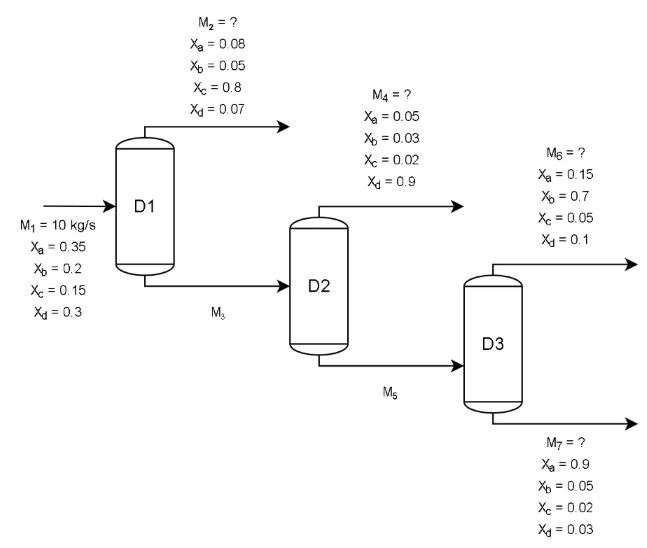

#### Question 2.1

Set up a system of linear equations in a matrix form $\mathbf{A}\vec{x} = \vec{b}$ that can be solved to obtain the steady-state values of the flows $\mathrm{M}_2$, $\mathrm{M}_4$, $\mathrm{M}_6$ and $\mathrm{M}_7$.

Define the matrix `A` and the vector `b`. Matrix `A` should be a 2D `numpy.ndarray` and `b` should be a 1D `numpy.ndarray`.

**HINT** We will later use the Gauss-Seidel method to solve this system of linear equations. Check the lecture slides to help you define `A` and `b`. What property should `A` have to support convergence of the Gauss-Seidel method?

In [12]:
# A = np.array(([0.08,0.05,0.8,0.07], [0.05,0.03,0.02,0.9], [0.15,0.7,0.05,0.1],[0.9,0.05,0.02,0.03]))
A = np.array(([0.9,0.05,0.02,0.03],
              [0.15,0.7,0.05,0.1],
              [0.08,0.05,0.8,0.07],
              [0.05,0.03,0.02,0.9]))

b = 10*np.array([0.3,0.15,0.35,0.2])



# b = 10*np.array([0.35,0.2,0.15,0.3])

print(f"matrix of A: {A}")
print(f'vector b : {b}')

matrix of A: [[0.9  0.05 0.02 0.03]
 [0.15 0.7  0.05 0.1 ]
 [0.08 0.05 0.8  0.07]
 [0.05 0.03 0.02 0.9 ]]
vector b : [3.  1.5 3.5 2. ]


In [13]:
grader.check("q2.1")

q2.1 results: All test cases passed!

#### Question 2.2

The **fixed point iteration** method can be exploited to solve linear systems in the following form:
\begin{equation}
\tag{Eq. 2}
\vec{x}_{i+1} = \mathbf{C}\vec{x}_{i} + \vec{g}
\end{equation}
Depending on the specific algorithm (Jacobi, Gauss-Seidel, etc.) the way matrix $\mathbf{C}$ and vector $\vec{g}$ are defined is different. However, the iterative solution will follow equation $2$ for all algorithms. For this reason, write a `fixed_point_iteration` function that takes as input the following arguments:
- a matrix `C`
- a vector `g`
- a first-guess solution `x0`
- a maximum number of iteration `max_iter`
- a absolute error tolerance `eps`

The function should be able to iteratively approach the solution using fixed point iterations (equation $2$) until one of these two conditions is met: 
1. The approximated absolute error is smaller than a given value $\left(\varepsilon = 1 \cdot 10^{-9}\right)$
2. The code has run for a given maximum number of iterations $\left(N = 100\right)$

The estimate absolute error $\varepsilon$ at the `i-th` iteration is defined as
\begin{equation}
\tag{Eq. 3}
\varepsilon = \| \vec{x}_{i}-\vec{x}_{i-1} \|
\end{equation}
The function should then return the solution vector `x` in case either condition for termination is met (error below tolerance or exceeding maximum number of iterations). You can print out the number of iterations used to converge (this feature will be useful to compare the efficiency of different algorithms). However, make sure to comment out the print statement when you apply the test for this task.

In [14]:
def fixed_point_iteration(
    C: npt.NDArray,
    g: npt.NDArray,
    x0: npt.NDArray,
    max_iter: int = 100,
    eps: float = 1e-9,
) -> npt.NDArray:
    """Method to solve linear systems via fixed point iteration method.

    Args:
        C (npt.NDArray): Matrix C
        g (npt.NDArray): Vector g
        x0 (npt.NDArray): Initial guess
        max_iter (int): Maximum number of iterations. Defaults to 100.
        eps (float): Absolute error tolerance. Defaults to 1e-9.

    Returns:
        x (npt.NDArray): Solution vector x
    """
    
    # x = x0.copy()
    # for i in range(1,max_iter+1):
    #     x_old = x 
    #     x = np.dot(C,x) + g
    #     error = np.linalg.norm(x-x_old)
    #     if error < eps:
    #         return x
        
    # return x
    
    x = x0.copy()
    for i in range(max_iter):
        x_new = np.dot(C,x) +g
        if np.linalg.norm(x_new-x) <eps:
            return x_new
        x = x_new

            

    return x

x0 = np.zeros(len(b))
print(fixed_point_iteration(A,b,x0,100))

[256.5669622  251.00227547 257.59674484 249.73076269]


In [15]:
grader.check("q2.2")

q2.2 results: All test cases passed!

#### Question 2.3

Write a function `gauss_seidel` that is able to solve the system of equations (Eq. $1$) derived in Question 2.1 using the Gauss-Seidel algorithm as introduced in the lecture:

$x^{(k+1)}=(D+L)^{-1}b-(D+L)^{-1}Ux^{(k)}$

$D, L$, and $U$ are the diagonal, lower triangular, and upper triangular matrices associated with the matrix `A`, respectively. 


The `gauss_seidel` function should take the following arguments as input:
- a matrix `A`
- a vector `b`
- a first-guess solution `x0`
- a maximum number of iteration `max_iter`
- a absolute error tolerance `eps`

Use the function `fixed_point_iteration` you defined above inside your `gauss_seidel` method to solve the fixed point system arising in the Gauss-Seidel method.

HINT: Find suitable definitions for the inputs `C` and `g` to the `fixed_point_iteration` function, based on the system of equation $\mathbf{A}\vec{x} = \vec{b}$, according to the Gauss-Seidel method.

Check your results by comparing your solutions vector `x` with the vector `y` obtained when calling _[`numpy.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html)_ to solve the linear system (equation $1$).

Print the norm of the difference vector `x-y`. The quantity $\| \vec{x} - \vec{y}\|$ measures the distance of the approximate solution `x` from the analytical solution `y`. Note how the value of this norm compare to the absolute error imposed to your functions $\left(\varepsilon = 1 \cdot 10^{-9}\right)$

HINT: The convergence of Gauss-Seidel method is influenced by the ordering of the equation (please, refer to slides Q1-Lecture 3)! Check if your matrix `A` is **diagonally dominant**.

In [16]:
def gauss_seidel(A:np.array, b:np.array, x0:np.array, max_iter:int, eps:int)-> np.array:
    """
    A: matrix a
    b: vector b 
    x0: intial guesses in a np.array 
    max_iter: is the maximum number of iterations 
    eps: a absolute error tolerance 
    Using the gauss-seidel method, the initail guesses are conveiged to the correct vector answers x. This function utilizes the equation 
    x(k+1) = (D-L)ˆ1b -(D+L)ˆ-1Ux
    and changes it into the following format 
    x(k+1) = Cx(k) + g
    After which the fixed_point_iteration method is applied to calculate the following step. 
    """

    # C = np.dot(np.diag(1.0/np.diag(A)), -np.tril(A,-1) - np.triu(A, +1))
    # g = np.dot(np.diag(1.0/np.diag(A)), b)
    # return fixed_point_iteration(C,g,x0,max_iter, eps)
    

    D = np.diag(np.diag(A))
    L = np.tril(A,k=-1)
    U = np.triu(A,k=1)

    D_inv = np.linalg.inv(D+L)

    # g = np.dot(D_inv,b)
    g = D_inv@b
    C = -D_inv@U

    x = fixed_point_iteration(C,g,x0=x0,max_iter=max_iter, eps=eps)
    return x



In [17]:
# compute numerical solution with your Gauss-Seidel algorithm
# what is the first guess
x0 = np.zeros(len(b))
print("Gauss-Seidel method:")
# print(gauss_seidel(A,b,x0,100,10e-9))
x_gauss_seidel = gauss_seidel(A,b,x0,max_iter =100,eps=1e-9)
print(x_gauss_seidel)
# linalg.solve to compute y
y = np.linalg.solve(A,b)
print("np.linalg.solve:")
print(y)
# now check the absolute error between your solution and np.linalg.solve
print("Absolute error: {:.2e}".format(np.linalg.norm(x_gauss_seidel - y)))

Gauss-Seidel method:
[3.13249902 0.92163774 3.83507592 1.93224933]
np.linalg.solve:
[3.13249902 0.92163774 3.83507592 1.93224933]
Absolute error: 2.52e-11


In [18]:
grader.check("q2.3")

q2.3 results: All test cases passed!

### Part 3: Solving a nonlinear system of equations applied to a continuously stirred-tank reactor

Consider a continuously operated stirred tank reactor hosting two reactions running in parallel. The reactions are assumed to be first-order elementary reactions. The reaction volume is assumed to be constant. We assume an ideally-mixed system and thus conclude that the concentrations of the components $A,B,C,$ and $D$ in the outlet are equal to the respective concentrations inside the reactor.



We would like to find out what the outlet concentrations of the components $A,B,C,$ and $D$ are at steady state. We assume that the reaction constants $k_1, k_2$ are **not** dependent on the reaction temperature. Thus, we do not need to consider energy balances to compute the concentrations of the four components in the outlet. We assume constant component densities and neglect diffusive exchange with the environment. Furthermore, we model the reactor content as a homogeneous phase and neglect the mass and volume of the catalyst. To derive the model equations for the reactor volume, we derive four component mole balances for the reactor content:
\begin{split}
\frac{d}{dt} (Vc_A) &= F(c_{A, in}-c_A)+ V (-k_1c_Ac_B)\\
\frac{d}{dt} (Vc_B) &= F(c_{B, in}-c_B)+ V (-k_1c_Ac_B-k_2c_Cc_B)\\
\frac{d}{dt} (Vc_C) &= F(c_{C, in}-c_C)+ V (k_1c_Ac_B-k_2c_Cc_B)\\
\frac{d}{dt} (Vc_D) &= F(c_{D, in}-c_D)+ V (k_2c_Cc_B).
\end{split}

Since we assume steady state conditions, i.e., $d(\cdot)/dt = 0$, the left-hand side of our system of equations evaluates to zeros. We thus obtain the following system of algebraic equations assuming $x_1 = c_A, x_2 = c_B, x_3 = c_C, x_4 = c_D$:
\begin{align}
0 &= F(c_{A, in}-x_1)+ V (-k_1x_1x_2)\\
0 &= F(c_{B, in}-x_2)+ V (-k_1x_1x_2-k_2x_3x_2)\\
0 &= F(c_{C, in}-x_3)+ V (k_1x_1x_2-k_2x_3x_2)\\
0 &= F(c_{D, in}-x_4)+ V (k_2x_3x_2)
\end{align}

The values for $F, V, k_1, k_2, c_{A,in}, c_{B,in}, c_{C,in}, c_{D,in}$ are assumed to be known and constant:
$F = 1 l/h, V = 100 l, c_{A,in}=1 kmol/l, c_{B,in}=2 kmol/l, c_{C,in}=0 kmol/l, c_{A,in}=0 kmol/l, k_1 = 1 l/(h \cdot kmol), k_2 = 1 l/(h \cdot kmol)$.

In the third part of this assignment, you will solve the nonlinear system of equations numerically using the Newton-Raphson method. The steps you need to take to accomplish this include
- defining two function to compute the function values and the jacobian matrix of our nonlinear system of equations, respectively
- implement the Newton-Raphson method **without** using the inverse of the jacobian matrix.

#### Question 3.1
First, define a parameter vector `p` that contains the given values $F, V, k_1, k_2, c_{A,in}, c_{B,in}, c_{C,in}, c_{D,in}$ as a numpy array object according to _[`numpy.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)_.

In [19]:
flow = 1
vol = 100
cAin = 1
cBin = 2
cCin = 0
cDin = 0
k1 = 1
k2 = 1
# define parameter vector
p = np.array([flow, vol, k1, k2, cAin, cBin, cCin, cDin])

In [20]:
grader.check("q3.1")

q3.1 results: All test cases passed!

#### Question 3.2

You should now define a function `func_CSTR` to compute $\boldsymbol{F}(x^k)$. 
The function `func_CSTR` takes as input values
- `x`: the solution vector at the current iterate, i.e., $c_A, c_B, c_C, c_D$ in this excat order.
- `p`: parameter vector containing $F, V, k_1, k_2, c_{A,in}, c_{B,in}, c_{C,in}, c_{D,in}$ in this exact order.


The output of the function `func_CSTR` is the result of the system of equations specified in equations (1), (2), (3), and (4) of Part 3 in this exact order. The output type should be `npt.NDArray`.

In [21]:
def func_CSTR(x, p) -> np.ndarray:
    """
    x: the solution vector at the current iterate [cA, cB, cC, cD]
    p: parameter vector containing [F, V, k1, k2, cAin, cBin, cCin, cDin]

    this function provides the system of equations. 
    """
    dxdt = np.zeros(len(x))
    F, V, k1, k2, cAin, cBin, cCin, cDin = p

    dxdt[0] = F*(cAin - x[0]) + V*(-k1*x[0]*x[1])
    dxdt[1] = F*(cBin - x[1]) + V*(-k1*x[0]*x[1] - k2*x[1]*x[2])
    dxdt[2] = F*(cCin - x[2]) + V*( k1*x[0]*x[1] - k2*x[1]*x[2])
    dxdt[3] = F*(cDin - x[3]) + V*(k2*x[1]*x[2])

    return dxdt


In [22]:
grader.check("q3.2")

q3.2 results: All test cases passed!

#### Question 3.3

You should now define the function `jacobian_CSTR` to compute $\boldsymbol{J}(x^k)$. Derive it manually on paper first, then implement it.

The function `jacobian_CSTR` takes as input values
- `x`: the solution vector at the current iterate, i.e., $cA, cB, cC, cD$ in this excat order.
- `p`: parameter vector containing $F, V, k_1, k_2, c_{A,in}, c_{B,in}, c_{C,in}, c_{D,in}$ in this exact order.


The output of the function `jacobian_CSTR` is the jacobian of the system of equations specified in equations (1), (2), (3), and (4) of Part 3 in this exact order. The output type should be `npt.NDArray`.

In [23]:

def jacobian_CSTR(x, p) -> npt.NDArray:
    """
    x: the solution vector at the current iterate [cA, cB, cC, cD]
    p: parameter vector containing [F, V, k1, k2, cAin, cBin, cCin, cDin]

    This function creates a npt.NDArray of the jacobian (first order derivative) of the system of equation. 
    It is done so manualy

    """
    F, V, k1, k2, cAin, cBin, cCin, cDin = p

    jacobian = [
        [-F + V*(-k1*x[1]), V*(-k1*x[0]), 0, 0],
        [V*(-k1*x[1]), -F + V*(-k1*x[0]-k2*x[2]), V*(-k2*x[1]), 0],
        [V*(k1*x[1]), V*(k1*x[0]-k2*x[2]), -F + V*(-k2*x[1]), 0],
        [0, V*(k2*x[2]), V*(k2*x[1]), -F]
    ]

    return np.array(jacobian)


In [24]:
grader.check("q3.3")

q3.3 results: All test cases passed!

#### Question 3.4
In lecture Q1-L3, we presented the Newton-Raphson method for solving a system of nonlinear equations. To derive the next iterate $x^{k+1}$ based on the current iterate $x^k$, we would need to first compute the inverse of the Jacobian $\boldsymbol{J}^{-1}(x^k)$ if we choose the following updating rule:
\begin{equation}
\boldsymbol{x}^{k+1} = \boldsymbol{x}^k-\boldsymbol{J}^{-1}(x^k)\boldsymbol{F}(x^k).
\tag{1}
\end{equation}
We are going to try a different approach in this assignment. Instead of inverting the Jacobian, we would like to use an iterative method for solving linear systems, e.g., the Gauss-Seidel approach.

First, we reformulate the problem statement to
\begin{equation}
\boldsymbol{F}(x^k)+\boldsymbol{J}(x^k)(\boldsymbol{x}^{k+1}-\boldsymbol{x}^k) = \boldsymbol{0}.
\tag{2}
\end{equation}
This looks like a linear system if the variable $\boldsymbol{x^{*}}=\boldsymbol{x}^{k+1}-\boldsymbol{x}^k$ is introduced.

Recall the `gauss_seidel` function you defined earlier. Think of a way to use the Gauss-Seidel method to solve the system of nonlinear equations iteratively! **NOTE**: you don't have to implement the Gauss-Seidel method again, rather you have to use the function `gauss_seidel` implemented earlier.

You are required to estimate the error in order to using it as stopping criteria. For this method, we want to evaluate the *estimated relative error* defined as follows:
\begin{equation}
\epsilon = \frac{|x^k-x^{k-1}|}{x^k}
\tag{3}
\end{equation}

The stopping criteria is given by the comparison of the estimated relative error and an arbitrary relative tolerance `rtol` (i.e., $\epsilon <$ `rtol` -> stop).

You are ready to implement the Newton-Raphson method by executing the `gauss_seidel` function defined in question 2.3 at each iteration. Fill in the function `newton_raphson` taking the input arguments
- `x_start`: the initial guess for the solution vector
- `p`: the parameter vector
- `max_iter`: the maximum number of iterations
- `rtol`: the relative tolerance as stopping criterion.

The output of the function `newton_raphson` is the root of the problem.

In [25]:
def newton_raphson(x_start, p, max_iter=100, rtol=1e-05)-> npt.NDArray:
    """
    Variables : 
    x_start   : 
    p         : 
    max_iter  : 
    rtol      :

    Description of the function: 

    """

    x= x_start.copy()

    for i in range(max_iter):
        x_old=x
        jacobian = jacobian_CSTR(x_old, p)
        function = func_CSTR(x_old,p)

        x_s= gauss_seidel(jacobian, -function, x_old, max_iter, rtol)

        x = x_old +x_s
        error = np.linalg.norm(x - x_old)/np.linalg.norm(x) 
        if error < rtol: 
            return x
        
        

    return x

In [26]:
grader.check("q3.4")

q3.4 results: All test cases passed!

#### Question 3.5

Finally, apply your implementation of the Newton-Raphson method to solve for the steady-state solution of the described CSTR. Compare your solution to the output of the scipy built-in function _[`scipy.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)_

**HINT** Check the documentation of _[`scipy.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)_ for instructions: The `args` argument of fsolve allows you to pass extra arguments (e.g., the parameter array `p`) to the function you intend to find the root of.

In [27]:
x_start = np.array([1,2,0,0])
# your solution with your implementation of the Newton Raphson method
x_sol = newton_raphson(x_start, p)
print(x_sol)
# the solution using fsolve
x_fsolve = scipy.optimize.fsolve(func_CSTR,x_start, p)
print(x_fsolve)
print(
    "Absolute error between scipy.optimize.root and Newton-Raphson: {:.2e}\n\n".format(
        np.linalg.norm(x_sol - x_fsolve)
    )
)

[0.05658799 0.16670721 0.05338563 0.88997695]
[0.05661365 0.16663585 0.05340854 0.8899778 ]
Absolute error between scipy.optimize.root and Newton-Raphson: 7.92e-05




In [28]:
grader.check("q3.5")

q3.5 results: All test cases passed!

## Part 4: Gauss-Seidel vs Jacobi Method Differences

Let's create a concrete example that shows how Gauss-Seidel and Jacobi methods can behave differently in terms of convergence speed and stability. Closely inspect the provided example and reflect on the convergence behaviour of each method. **HINT** pay attention to the spectral radius of the example problem.

In [29]:
# Example 1: Convergence Speed Comparison
print("=== EXAMPLE: CONVERGENCE SPEED COMPARISON ===")
print("System: 4x + y = 1, x + 3y = 2")
print()

# Create a well-conditioned system where both methods converge but at different rates
A_example = np.array([[4.0, 1.0], [1.0, 3.0]])
b_example = np.array([1.0, 2.0])
x0_example = np.array([0.0, 0.0])

print("System matrix A:")
print(A_example)
print("Right-hand side b:")
print(b_example)
print("Exact solution:", np.linalg.solve(A_example, b_example))
print()

# Test both methods with detailed convergence tracking


def fixed_point_iteration_detailed(
    C: npt.NDArray,
    g: npt.NDArray,
    x0: npt.NDArray,
    max_iter: int = 20,
    eps: float = 1e-10,
) -> tuple[npt.NDArray, list[float], int]:
    """
    Fixed point iteration algorithm that returns both solution and
    convergence history.
    Args:
        C (npt.NDArray): Matrix C
        g (npt.NDArray): Vector b
        x0 (npt.NDArray): Initial guess
        max_iter (int): Maximum number of iterations. Defaults to 100.
        eps (float): Absolute error tolerance. Defaults to 1e-9.
    Returns:
        x (npt.NDArray): Solution vector x
        history (list[float]): List of errors at each iteration
        iters (int): Number of iterations performed
    """
    x = x0.copy()
    history = [np.linalg.norm(x)]

    for i in range(max_iter):
        x_old = x.copy()
        x = np.dot(C, x) + g
        error = np.linalg.norm(x - x_old)
        history.append(error)

        if error < eps:
            return x, history, i + 1

    return x, history, max_iter


# Gauss-Seidel matrices
D_inv = np.diag(1.0 / np.diag(A_example))
L = np.tril(A_example, -1)
U = np.triu(A_example, 1)

C_gs = -np.dot(np.linalg.inv(np.diag(np.diag(A_example)) + L), U)
g_gs = np.dot(np.linalg.inv(np.diag(np.diag(A_example)) + L), b_example)

# Jacobi matrices
C_j = -np.dot(D_inv, L + U)
g_j = np.dot(D_inv, b_example)

# Run both methods
sol_gs, hist_gs, iter_gs = fixed_point_iteration_detailed(C_gs, g_gs, x0_example)
sol_j, hist_j, iter_j = fixed_point_iteration_detailed(C_j, g_j, x0_example)

print("Gauss-Seidel:")
print(f"  Solution: {sol_gs}")
print(f"  Converged in {iter_gs} iterations")
print(f"  Final error: {hist_gs[-1]:.2e}")

print("Jacobi:")
print(f"  Solution: {sol_j}")
print(f"  Converged in {iter_j} iterations")
print(f"  Final error: {hist_j[-1]:.2e}")

# Convergence comparison
print(
    f"\nGauss-Seidel was {'faster' if iter_gs < iter_j else 'slower'} by {abs(iter_gs - iter_j)} iterations"
)

=== EXAMPLE: CONVERGENCE SPEED COMPARISON ===
System: 4x + y = 1, x + 3y = 2

System matrix A:
[[4. 1.]
 [1. 3.]]
Right-hand side b:
[1. 2.]
Exact solution: [0.09090909 0.63636364]

Gauss-Seidel:
  Solution: [0.09090909 0.63636364]
  Converged in 11 iterations
  Final error: 2.98e-11
Jacobi:
  Solution: [0.09090909 0.63636364]
  Converged in 20 iterations
  Final error: 3.61e-11

Gauss-Seidel was faster by 9 iterations


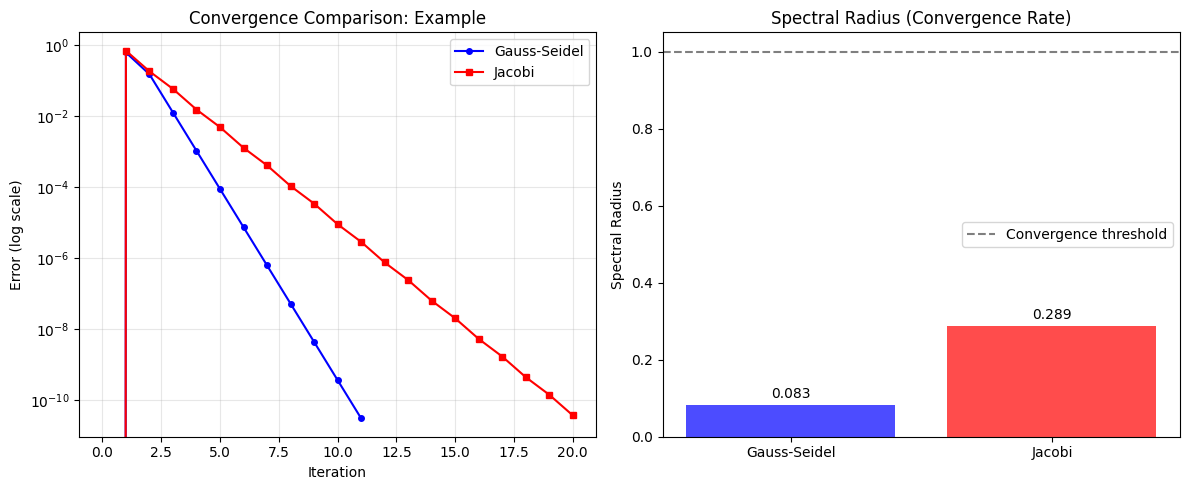


Spectral Radius Analysis:
Gauss-Seidel: spectral radius = 0.0833
Jacobi: spectral radius = 0.2887


In [30]:
# Plot convergence comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
iterations_gs = range(len(hist_gs))
iterations_j = range(len(hist_j))

plt.semilogy(iterations_gs, hist_gs, "b-o", label="Gauss-Seidel", markersize=4)
plt.semilogy(iterations_j, hist_j, "r-s", label="Jacobi", markersize=4)
plt.xlabel("Iteration")
plt.ylabel("Error (log scale)")
plt.title("Convergence Comparison: Example")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Show spectral radius (theoretical convergence rate)
eig_gs = np.linalg.eigvals(C_gs)
eig_j = np.linalg.eigvals(C_j)
spectral_radius_gs = np.max(np.abs(eig_gs))
spectral_radius_j = np.max(np.abs(eig_j))

methods = ["Gauss-Seidel", "Jacobi"]
spectral_radii = [spectral_radius_gs, spectral_radius_j]
colors = ["blue", "red"]

bars = plt.bar(methods, spectral_radii, color=colors, alpha=0.7)
plt.ylabel("Spectral Radius")
plt.title("Spectral Radius (Convergence Rate)")
plt.axhline(
    y=1, color="black", linestyle="--", alpha=0.5, label="Convergence threshold"
)
plt.legend()

# Add value labels on bars
for bar, value in zip(bars, spectral_radii):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{value:.3f}",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

print("\nSpectral Radius Analysis:")
print(f"Gauss-Seidel: spectral radius = {spectral_radius_gs:.4f}")
print(f"Jacobi: spectral radius = {spectral_radius_j:.4f}")